In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from scipy.stats import binom as bn
import pandas as pd

# Second Question (א) 

In [2]:
def Empirical_F(X):
    #Defining Y = Empiric Ecumilation Function Values 
    #Defining Counter to 1
    #Defining M loops for returning numbers
    Y = np.zeros_like(X)
    counter = 1
    M = 0
    
    #Sorting X
    X = X.astype('float64')
    Y = Y.astype('float64')
    X = np.sort(X)
    
    #Looping Over X
    for i in range(X.size):
    
    #Overflow Bug Fix
        if(i+1== X.size):
            if M>0:  #There Was Repeats So We
                for j in range(M+1):
                    Y[i-j] =1
                    continue
            Y[X.size-1]=1
            break
        
        #Same Varuble
        if(X[i]==X[i+1]):
            counter = counter + 1
            M = M + 1
            continue
        
        #!(Same Varuble)
        else:
                if M>0:  #There Was Repeats So We
                    num = counter/(X.size)
                    for j in range(M+1):
                        Y[i-j] = num
                        continue
                    M=0
                    counter = counter + 1
                
                else:     #No Repeats
                    Y[i]= (counter/(X.size))
                    counter = counter + 1
            
        
    return np.matrix([X,Y]).transpose()

2.ב

In [3]:
X=bn.rvs(n=5, p=0.2, size=20)

2.ג

In [4]:
Y=Empirical_F(X)
Y

matrix([[0.  , 0.15],
        [0.  , 0.15],
        [0.  , 0.15],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [1.  , 0.7 ],
        [2.  , 0.95],
        [2.  , 0.95],
        [2.  , 0.95],
        [2.  , 0.95],
        [2.  , 0.95],
        [3.  , 1.  ]])

2.ד

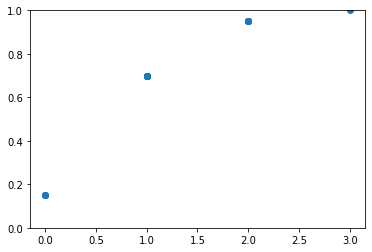

In [5]:
plt.scatter(np.array(Y.transpose()[0,:]),np.array(Y.transpose()[1:]))
plt.ylim(0,1)
plt.step(0.1,0.1)

2.ה

In [6]:
Y_new = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
bn.cdf(Y_new,5,1/6)

array([0.40187757, 0.80375514, 0.96450617, 0.99665638, 0.9998714 ,
       1.        ])

2.ו

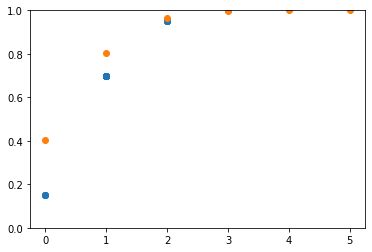

In [7]:
plt.scatter(np.array(Y.transpose()[0,:]),np.array(Y.transpose()[1:]))
plt.ylim(0,1)
plt.step(0.1,0.1)
plt.scatter(Y_new,bn.cdf(Y_new,5,1/6))
plt.show()

2.ז

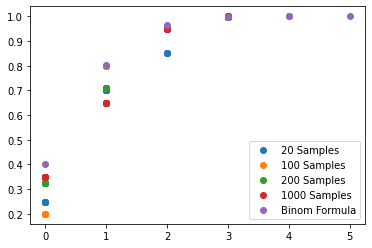

In [8]:
X_20 = bn.rvs(n=5, p=0.2, size=20)
X_100 = bn.rvs(n=5, p=0.2, size=20)
X_200 = bn.rvs(n=5, p=0.2, size=200)
X_1000 = bn.rvs(n=5, p=0.2, size=20)
Y_20=Empirical_F(X_20)
Y_100=Empirical_F(X_100)
Y_200=Empirical_F(X_200)
Y_1000=Empirical_F(X_1000)
plt.scatter(np.array(Y_20.transpose()[0,:]),np.array(Y_20.transpose()[1:]),label = '20 Samples')
plt.scatter(np.array(Y_100.transpose()[0,:]),np.array(Y_100.transpose()[1:]),label = '100 Samples')
plt.scatter(np.array(Y_200.transpose()[0,:]),np.array(Y_200.transpose()[1:]),label = '200 Samples')
plt.scatter(np.array(Y_1000.transpose()[0,:]),np.array(Y_1000.transpose()[1:]),label = '1000 Samples')
plt.scatter(Y_new,bn.cdf(Y_new,5,1/6),label = 'Binom Formula')
plt.legend()
plt.show()

ניתן להסיק כי ככל שהמדגם גדול בהתפלגות האמפירית כך התוצאה קרובה יותר להתפלגות התאורתית (חוק המספרים הגדולים בהנחה כי המדגם הוא אכן אמפירי ורנדומלי )

# Question 3

### 3א.

In [9]:
path ="C:\\Users\\almog\\Desktop\\Almog's_WorkFile\\PandasAndJupyter\\Statistics Homework\\HomeWork Number 1\\appendicitis.csv"

In [10]:
df = pd.read_csv(path)

In [11]:
df

,Sex,Age,Pathology
0,Male,72,1
1,Female,88,1
2,Male,74,1
3,Female,69,1
4,Female,69,2
...,...,...,...
262,Male,35,1
263,Female,40,1
264,Female,20,2
265,Female,85,1


In [12]:
patho=df['Pathology']
print((patho[patho==2].size)/patho.size,"ההסתברות האמפירית של מנותח להתגלות כמנותח שווא")

0.24344569288389514 ההסתברות האמפירית של מנותח להתגלות כמנותח שווא


### 3ב.

In [13]:
df.groupby(['Sex','Pathology']).

Age
Sex    Pathology     
Female 1          101
       2           47
Male   1          101
       2           18

### 3ג.

In [14]:
print(18/119,"ההסתברות האמפירית להישלח לניתוח שווא עבור גבר")
print(47/148,"ההסתברות האימפירית להישלח לניתוח שווא עבור אישה")

0.15126050420168066 ההסתברות האמפירית להישלח לניתוח שווא עבור גבר
0.31756756756756754 ההסתברות האימפירית להישלח לניתוח שווא עבור אישה


על פי הנתונים האימפיריים הסיכוי עבור אישה להישלח לניתוח שווה גבוהה פי 2 אח ניתן לשים לב כי ישנו הבדל בין הנתונים מבחינת מספר הנבדקים וכי המדגם היינו קטן בשביל לקבוע שאכן הנתונים מסוגלים לקבוע מגדר מסוים שיותר סביר שישלח .

לתמיכה נשים לב כי מספר הנבדקים של הנשים היינו גדול ב-29 נבדקות והיינו מהבא כמעט רבע ממספר הנבדקים הגבריים שכן מספר גבוהה הנ"ל יכול לשנות דרסטית את תוצאות הניתוח

# Question 4

In [15]:
Over_All = 2201
Y = 13+240+875+670
O = Over_All-Y
Dead = 1491
Alive= Over_All - Dead
Y_D = 3 + 140 + 500 + 665
O_D = Dead - Y_D
f_Class = 325
y_f =13
O_f = 312
y_D_F = 3
o_D_F = 120


In [16]:
Y_D/Dead , O_D/Dead

(0.8772635814889336, 0.1227364185110664)

In [17]:
(y_D_F+o_D_F)/f_Class , (1491-(y_D_F+o_D_F))/(Over_All-f_Class)

(0.37846153846153846, 0.7292110874200426)

In [18]:
(y_D_F/y_f) , (o_D_F)/O_f

(0.23076923076923078, 0.38461538461538464)

ניתן לראות מן הנתונים כי אחוז המתים של הצעירים (89%) גבוהה בהרבה מאחוז המתים הזקנים(12%) על הטיטאניק! 

וניתן לראות כי אם היינך מהמחלקה הראשונה אחוזיי התמותה נמוכים יותר(37.8%) משאר הספינה יחדיו)72.9% 

זהו פארדוקס סימפסון הנובע מקריאת נתונים לא נכונה

נשים לב כי אם היינך זקן מהמחלקה הראשונה אזיי אחוזיי התמותה היינם אלא גבוהים יותר מאשר הצעירים!
23%<38%